In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
dataset = pd.read_csv("dataset3_results.csv")

In [165]:
def convert_to_float(x):
    if not x[0] == ">":
        return float(x)
    else:
        return 70000
import math

def log_convertion(x):
    res = 1 - math.log(x)/math.log(50000)
    if res < 0: return 0
    return res

def get_from_array(x):
    tmp = x.strip("[]")
    return float(tmp)

def get_from_tuple(x):
    tmp = x.strip("()")
    tmp = tmp.split(",")
    return float(tmp[1])

dataset["3pHLA-score"] = dataset["3pHLA-score"].apply(get_from_array)
dataset["GD_score"] = dataset["GD_score"].apply(get_from_tuple)
dataset["dope_score"] = dataset["dope_score"].apply(get_from_tuple)
dataset["ba_float"] = dataset["BA"].apply(convert_to_float)
dataset["ba_log"] = dataset["ba_float"].apply(log_convertion)
dataset = dataset.sort_values(by=['ba_float', 'resolution'])  

In [166]:
dataset

,Unnamed: 0,peptide,pdb_code,BA,fname,complex_number,alt_conf,resolution,3pHLA-score,vina-score,vinardo-score,ad4_scoring-score,dope_score,path,foldx_score,GD_score,ba_float,ba_log
74,74,FLPSDFFPSV,3OXR,0.57,3OXR-1_complex.pdb,1,a,1.7,0.546826,-9.85172,-13.66995,-79.88352,1998.301758,/data/COMP590P/energy_analysis/Fixed_PDBs/3OXR...,-16.075900,-55.469,0.57,1.051953
42,42,FLPSDFFPSV,3OXS,0.57,3OXS-1_complex.pdb,1,a,1.75,0.538958,-10.20710,-14.40988,-79.75857,2031.212402,/data/COMP590P/energy_analysis/Fixed_PDBs/3OXS...,-19.925900,791.450,0.57,1.051953
19,19,FLPSDFFPSV,3OX8,0.57,3OX8-1_complex.pdb,1,a,2.16,0.536212,-9.50435,-13.38436,-74.94506,1937.515381,/data/COMP590P/energy_analysis/Fixed_PDBs/3OX8...,-13.381200,405.423,0.57,1.051953
57,57,FLPSDFFPSV,3OX8,0.57,3OX8-2_complex.pdb,2,a,2.16,0.541799,-10.00845,-14.26960,-79.57320,1939.263428,/data/COMP590P/energy_analysis/Fixed_PDBs/3OX8...,-13.403500,61.343,0.57,1.051953
21,21,FLPSDFFPSV,1HHH,0.57,1HHH-1_complex.pdb,1,a,3,0.541521,-9.38964,-12.63875,-79.03743,2011.900635,/data/COMP590P/energy_analysis/Fixed_PDBs/1HHH...,-15.436600,-128.731,0.57,1.051953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,ETLNEYKQL,NA6P,>70000,NA6P_complex.pdb,1,a,-,0.178695,-7.00214,-10.10812,-54.72781,1327.173584,/data/COMP590P/energy_analysis/Fixed_PDBs/NA6P...,-9.523360,-141.145,70000.00,0.000000
23,23,AAEQRRSTI,NG7L,>70000,NG7L_complex.pdb,1,a,-,0.146312,-5.66904,-7.56517,-50.11811,902.734131,/data/COMP590P/energy_analysis/Fixed_PDBs/NG7L...,-2.920080,-92.335,70000.00,0.000000
60,60,ATKRYPGVM,NIMV,>70000,NIMV_complex.pdb,1,a,-,0.095861,-6.25694,-7.11619,-44.67985,944.853149,/data/COMP590P/energy_analysis/Fixed_PDBs/NIMV...,-3.588400,-69.757,70000.00,0.000000
63,63,EIDVSEVKT,NG5R,>70000,NG5R_complex.pdb,1,a,-,0.087439,-6.37471,-8.89797,-45.51508,1093.936035,/data/COMP590P/energy_analysis/Fixed_PDBs/NG5R...,-11.419300,-120.118,70000.00,0.000000


In [167]:
scorings = ['vina-score', 'vinardo-score', 'ad4_scoring-score', 'foldx_score', 'GD_score', 'dope_score',  '3pHLA-score']

In [168]:
from scipy import stats

results={"function": [], "pearsons":[], "spearmans":[]}
for f in scorings:
    print(f)
    spear = stats.spearmanr(dataset["ba_float"], dataset[f])
    pear = stats.pearsonr(dataset["ba_float"], dataset[f])
    results["function"].append(f)
    results["pearsons"].append(pear)
    results["spearmans"].append(spear)
    

vina-score
vinardo-score
ad4_scoring-score
foldx_score
GD_score
dope_score
3pHLA-score


## Correlations

In [169]:
pd.DataFrame(results)

,function,pearsons,spearmans
0,vina-score,"(0.4582664211199807, 1.4953794526502665e-05)","(0.7088843317537417, 9.21499165726359e-14)"
1,vinardo-score,"(0.42773142485305427, 6.117916048105315e-05)","(0.652946877338611, 2.9750350013108935e-11)"
2,ad4_scoring-score,"(0.17633955904166365, 0.1130221621118922)","(0.5062826807466041, 1.2184679030809588e-06)"
3,foldx_score,"(0.2465806581145948, 0.025535251291590275)","(0.5640913603787095, 3.4141977345568e-08)"
4,GD_score,"(-0.17002808073411818, 0.12671720733365543)","(-0.14752783899984154, 0.1859475757683677)"
5,dope_score,"(-0.6151681732698114, 7.785424249550638e-10)","(-0.8349429062819012, 1.8852938768188502e-22)"
6,3pHLA-score,"(-0.5571831801136314, 5.4264910515722026e-08)","(-0.3704361589296531, 0.0006132711806223601)"


## AUROC, AUPRC values

In [170]:
thrs = [50, 500, 22000]

for i, thr in enumerate(thrs):
    dataset["binder_thr_"+str(thr)] = dataset["ba_float"].apply(lambda x: int(x<thr))

In [171]:
from scipy import stats
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

results={"function": [], "pearsons":[], "spearmans":[], "auroc_50":[]
        , "auroc_500":[], "auroc_22000":[], "ap_50":[]
        , "ap_500":[], "ap_22000":[]}
for f in scorings:
    print(f)
    spear = stats.spearmanr(dataset["ba_float"], dataset[f])
    pear = stats.pearsonr(dataset["ba_float"], dataset[f])
    for thr in thrs:
        y_true = [1-x for x in list(dataset["binder_thr_"+str(thr)] )]
        pred = list(dataset[f])
        if f in ['dope_score',  '3pHLA-score']:
            pred = [-x for x in pred]
            
        fpr, tpr, _ =roc_curve(y_true, pred)
        roc_auc = auc(fpr, tpr)
        results["auroc_"+str(thr)].append(roc_auc)
        ap = average_precision_score(y_true, pred)
        results["ap_"+str(thr)].append(ap)
        
        
    results["function"].append(f)
    results["pearsons"].append(pear)
    results["spearmans"].append(spear)

vina-score
vinardo-score
ad4_scoring-score
foldx_score
GD_score
dope_score
3pHLA-score


In [172]:
results_df = pd.DataFrame(results)
results_df

,function,pearsons,spearmans,auroc_50,auroc_500,auroc_22000,ap_50,ap_500,ap_22000
0,vina-score,"(0.4582664211199807, 1.4953794526502665e-05)","(0.7088843317537417, 9.21499165726359e-14)",0.840476,0.813218,0.898701,0.711597,0.522727,0.269803
1,vinardo-score,"(0.42773142485305427, 6.117916048105315e-05)","(0.652946877338611, 2.9750350013108935e-11)",0.850000,0.782328,0.867532,0.733925,0.494090,0.237879
2,ad4_scoring-score,"(0.17633955904166365, 0.1130221621118922)","(0.5062826807466041, 1.2184679030809588e-06)",0.732143,0.632902,0.823377,0.633108,0.354330,0.175489
3,foldx_score,"(0.2465806581145948, 0.025535251291590275)","(0.5640913603787095, 3.4141977345568e-08)",0.833929,0.704741,0.828571,0.740481,0.409356,0.196277
4,GD_score,"(-0.17002808073411818, 0.12671720733365543)","(-0.14752783899984154, 0.1859475757683677)",0.426786,0.478448,0.163636,0.481602,0.334261,0.042875
5,dope_score,"(-0.6151681732698114, 7.785424249550638e-10)","(-0.8349429062819012, 1.8852938768188502e-22)",1.000000,0.843391,0.997403,1.000000,0.688148,0.966667
6,3pHLA-score,"(-0.5571831801136314, 5.4264910515722026e-08)","(-0.3704361589296531, 0.0006132711806223601)",0.764881,0.755747,0.989610,0.846894,0.716470,0.911111


## All in one plot

In [198]:
thrs = [50, 500, 22000]

for i, thr in enumerate(thrs):
    dataset["binder_thr_"+str(thr)] = dataset["ba_float"].apply(lambda x: int(x<thr))

name_mapping = {"vina-score":"Vina",
               "vinardo-score": "Vinardo",
               "ad4_scoring-score": "AutoDock4",
               "foldx_score": "FoldX",
               "GD_score": "GradDock",
               "dope_score": "Dope",
               "3pHLA-score":"3pHLA-score"}
for f in scorings:
    scores = list(dataset[f])
    min_s = min(scores)
    max_s = max(scores)
    dataset[f+"_scaled"] = dataset[f].apply(lambda x: (x-min_s)/(max_s-min_s)) 
    if not f in ['dope_score',  '3pHLA-score']:
        dataset[f+"_scaled"] = 1-dataset[f+"_scaled"]
    
#reformat and scale
ref_res = {"score":[], "type":[], "ba":[]}
for i, row in dataset.iterrows():

    for f in scorings:
        ref_res["score"].append(row[f+"_scaled"])
        ref_res["type"].append(f)
        ref_res["ba"].append(row["ba_float"])
        
def label_ba_lvl(x):
    if x <50: return "strong"
    if x <500: return "medium"
    if x <22000: return "weak"
    return "non-binder"       

ref_res_df = pd.DataFrame(ref_res)

ref_res_df["binder_lab"] = ref_res_df["ba"].apply(label_ba_lvl)

ref_res_df["name"] = ref_res_df["type"].apply(lambda x: name_mapping[x])
ref_res_df

,score,type,ba,binder_lab,name
0,0.870139,vina-score,0.57,strong,Vina
1,0.791632,vinardo-score,0.57,strong,Vinardo
2,1.000000,ad4_scoring-score,0.57,strong,AutoDock4
3,0.844741,foldx_score,0.57,strong,FoldX
4,0.900103,GD_score,0.57,strong,GradDock
...,...,...,...,...,...
569,0.426325,ad4_scoring-score,70000.00,non-binder,AutoDock4
570,0.367875,foldx_score,70000.00,non-binder,FoldX
571,0.923736,GD_score,70000.00,non-binder,GradDock
572,0.000000,dope_score,70000.00,non-binder,Dope


In [199]:
order = ["Dope", "3pHLA-score", "Vina", "Vinardo", "FoldX", "AutoDock4", "GradDock"]

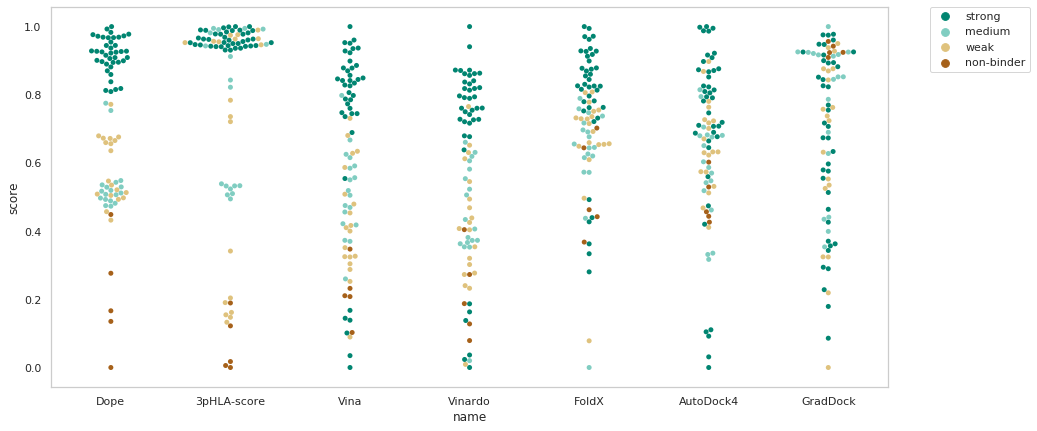

In [288]:
sns.set(rc={"figure.figsize": (15,7)})
sns.set_style("whitegrid")
palette = {"strong": "#018571", "medium": "#80cdc1", "weak": "#dfc27d", "non-binder":"#a6611a"} 
ax = sns.swarmplot(x="name", y="score", data=ref_res_df, hue="binder_lab", palette=palette, order=order)
ax.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("./figures/fig3-2.pdf")

## Correlation plots

In [281]:
def label_ba_lvl(x):
    if x <50: return "strong"
    if x <500: return "medium"
    if x <22000: return "weak"
    return "non-binder" 

palette2 = {"strong": "#052f29", "medium": "#365b55", "weak": "#756438", "non-binder":"#59340e"} 
dataset['binder_lab'] = dataset['ba_float'].apply(lambda x: label_ba_lvl(x))
dataset['color'] = dataset['binder_lab'].apply(lambda x: palette[x])
dataset['linecolor'] = dataset['binder_lab'].apply(lambda x: palette2[x])

In [282]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

def make_boxplot(dataset, f):
    traces =[]
    for pep in dataset["peptide"].iloc[::-1].unique():
        box = go.Box(name=pep,
                x=list(dataset[dataset["peptide"]==pep][f+'_scaled']),
                boxpoints=False,
                jitter=0.5,
                whiskerwidth=0.2,
                fillcolor=dataset[dataset["peptide"]==pep]['color'].iloc[0],
                line=dict(color=dataset[dataset["peptide"]==pep]['linecolor'].iloc[0], width=1),
                marker=dict(
                    size=2,
                    color='rgb(0, 0, 0)'
                ),
            )
        traces.append(box)    
    fig = go.Figure(data=traces)
    fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor' : 'rgba(0, 0, 0, 0)',
        'paper_bgcolor' : 'rgba(0, 0, 0, 0)',
        'font_family': "Times New Roman",
        'boxgap':0.15,
        'showlegend':False,
        'boxgroupgap':0.15, 'width':350, 'height':450,
        'xaxis':{'title': name_mapping[f],
                'autorange':'reversed',
                'linecolor' : 'Black',
                 'zeroline': True,
                 "showline": True},
        'yaxis':{'tickfont': {'size':10}, 
                 'dtick':0.1,
                 'linecolor' : 'Black',
                 'zeroline': True,
                 'title': "Peptide",
                  "showline": True}
        })
    return fig

In [287]:
for f in scorings:
    fig = make_boxplot(dataset, f)
    fig.write_image("figures/boxplot-"+f+".svg")
    iplot(fig)